In [1]:
import numpy as np 
from astropy.io import fits 

In [2]:
direcE = '/users/PCON0003/koivuemily/PrimordialBlackHole/ElectronWaveFunctionFits/'
#direcE = '/fs/scratch/PCON0003/emily/'
hdu1 = fits.open(direcE+'min10ExtendedOmega.fits')
#hdu2 = fits.open(direcE+'min10f.fits')

FileNotFoundError: [Errno 2] No such file or directory: '/users/PCON0003/koivuemily/PrimordialBlackHole/ElectronWaveFunctionFits/min10ExtendedOmega.fits'

In [3]:
#hdu1.info()

In [4]:
#hdu2.info()

Filename: /users/PCON0003/koivuemily/PrimordialBlackHole/ElectronWaveFunctionFits/Extramin10ExtendedOmega.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1                1 BinTableHDU     22   120000R x 5C   [D, M, M, M, M]   
  2                1 BinTableHDU     22   120000R x 5C   [D, M, M, M, M]   
  3                1 BinTableHDU     22   120000R x 5C   [D, M, M, M, M]   
  4                1 BinTableHDU     22   120000R x 5C   [D, M, M, M, M]   
  5                1 BinTableHDU     22   120000R x 5C   [D, M, M, M, M]   
  6                1 BinTableHDU     22   120000R x 5C   [D, M, M, M, M]   
  7                1 BinTableHDU     22   120000R x 5C   [D, M, M, M, M]   
  8                1 BinTableHDU     22   120000R x 5C   [D, M, M, M, M]   
  9                1 BinTableHDU     22   120000R x 5C   [D, M, M, M, M]   
 10                1 BinTableHDU     22   120000R x 5C   [D, M, M, M, M]   
 11             

In [23]:
hdu1[-1].header['h']*8*np.pi*1.e21

19.999999999999982

In [3]:
prihdr = hdu1[0]
test = prihdr.header['type']
data1 = hdu1[1].data
test

'Electron Wavefunction'

In [4]:
hdu = fits.Header()
hdu['type']=prihdr.header['type']
hdu['r_init']=prihdr.header['r_init']
hdu['r_final']=prihdr.header['r_final']
hdu['M']= prihdr.header['M']
hdu['l']=prihdr.header['l']
hdu['tol']=prihdr.header['tol']
hdu['mu']=prihdr.header['mu']
hdu['nu']=prihdr.header['nu']
hdu['lam']=prihdr.header['lam']
empty_primary = fits.PrimaryHDU(header=hdu)
hdul = fits.HDUList([empty_primary])

In [22]:
hdu1[1403].data['G_points_in']

TypeError: buffer is too small for requested array

In [5]:
for i in range(1,1403,1):
    col1r = hdu1[i].data['rpoints_up']
    col2F = hdu1[i].data['F_points_up']
    col2G = hdu1[i].data['G_points_up']
    col2Fin = hdu1[i].data['F_points_in']
    col2Gin = hdu1[i].data['G_points_in']
    
    col1r = fits.Column(name='rpoints_up', format='D', array=col1r)
    col2F = fits.Column(name='F_points_up', format='M', array=col2F)
    col2G = fits.Column(name='G_points_up', format='M', array=col2G)
    col2Fin = fits.Column(name='F_points_in', format='M', array=col2Fin)
    col2Gin = fits.Column(name='G_points_in', format='M', array=col2Gin)
    
    cols = fits.ColDefs([col1r, col2F,col2G,col2Fin,col2Gin])
    table_hdu = fits.BinTableHDU.from_columns(cols)
    table_hdu.header['h']=hdu1[i].header['h']
    table_hdu.header['R']=hdu1[i].header['R']
    table_hdu.header['T']=hdu1[i].header['T']
    table_hdu.header['delta']=hdu1[i].header['delta']
    hdul.append(table_hdu)
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [6]:
import numpy as np 
import math
import matplotlib.pyplot as plt 

import I_functions_class as Inp
from astropy.io import fits

In [9]:
mu = 9.0968024e-28  
nu = 1.#in grams 
lam = 1.
GC = 1.
M = 1.e21
c = 1.
tol = 1.e-10

r_initial = 2000.*M
r_final= -70.*M

T = 1/(8*np.pi*M)
k = -10.
h = np.linspace(.01*T,20.*T,2000)

x=1403

In [10]:
EWF = Inp.ElectronWaveFunction(nu, h[x], k, mu, M, lam, GC, c, tol)
r_points, F_points, G_points = EWF.RK_4(r_initial, r_final, 240000, up = True)
r_points_in, F_points_in, G_points_in = EWF.RK_4(r_final, r_initial, 240000, up = False)
R,T,delta = EWF.get_R_and_T_coeff(r_points,F_points,G_points,r_points_in,F_points_in,G_points_in)


#store every other point in the file
#also save the reversed rin, and photon fields in so that you only have to store one r values

#cutoff r to 2000M so that we can match analytically in the integrator later

col1r = fits.Column(name='rpoints_up',format='D',array=r_points[::2])
col2F = fits.Column(name='F_points_up',format='M',array=F_points[::2])
col2G = fits.Column(name='G_points_up',format='M',array=G_points[::2])
col2Fin = fits.Column(name='F_points_in',format='M',array=F_points_in[::-1][::2])
col2Gin = fits.Column(name='G_points_in',format='M',array=G_points_in[::-1][::2])

cols = fits.ColDefs([col1r, col2F,col2G,col2Fin,col2Gin])

2e+24
(-5.392535355045424e-13+1.5661374881495508e-12j)
fpoints0 is (2.3635455568547703e-11+0j)
fpoints0 normalized is (-1.2745502978599873e-23+3.7016373015395615e-23j)
-7e+22
(-1.0270320530988692e-23-3.7778006006134773e-23j)
(3.7016312737900135e-23+1.2745482223811232e-23j) (1-1.023262874398847e-11j) (0.4182448200833825+0.9083343384863412j) (-0+42309386654.41361j)
0.9999999999986742 1.4813247329595984e-12


In [11]:
table_hdu = fits.BinTableHDU.from_columns(cols)
table_hdu.header['h']=h[x]
table_hdu.header['R']=R
table_hdu.header['T']=T
table_hdu.header['delta']=delta

hdul.append(table_hdu)

i =1403

col1r = [0]
col2F = [0]
col2G = [0]
col2Fin =[0]
col2Gin = [0]

col1r = fits.Column(name='rpoints_up', format='D', array=col1r)
col2F = fits.Column(name='F_points_up', format='M', array=col2F)
col2G = fits.Column(name='G_points_up', format='M', array=col2G)
col2Fin = fits.Column(name='F_points_in', format='M', array=col2Fin)
col2Gin = fits.Column(name='G_points_in', format='M', array=col2Gin)

cols = fits.ColDefs([col1r, col2F,col2G,col2Fin,col2Gin])
table_hdu = fits.BinTableHDU.from_columns(cols)
table_hdu.header['h']=hdu1[i].header['h']
table_hdu.header['R']=hdu1[i].header['R']
table_hdu.header['T']=hdu1[i].header['T']
table_hdu.header['delta']=hdu1[i].header['delta']
hdul.append(table_hdu)

In [12]:
for i in range(1,597,1):
    col1r = hdu2[i].data['rpoints_up']
    col2F = hdu2[i].data['F_points_up']
    col2G = hdu2[i].data['G_points_up']
    col2Fin = hdu2[i].data['F_points_in']
    col2Gin = hdu2[i].data['G_points_in']
    
    col1r = fits.Column(name='rpoints_up', format='D', array=col1r)
    col2F = fits.Column(name='F_points_up', format='M', array=col2F)
    col2G = fits.Column(name='G_points_up', format='M', array=col2G)
    col2Fin = fits.Column(name='F_points_in', format='M', array=col2Fin)
    col2Gin = fits.Column(name='G_points_in', format='M', array=col2Gin)
    
    cols = fits.ColDefs([col1r, col2F,col2G,col2Fin,col2Gin])
    table_hdu = fits.BinTableHDU.from_columns(cols)
    table_hdu.header['h']=hdu2[i].header['h']
    table_hdu.header['R']=hdu2[i].header['R']
    table_hdu.header['T']=hdu2[i].header['T']
    table_hdu.header['delta']=hdu1[i].header['delta']
    hdul.append(table_hdu)
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [28]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TYPE    = 'Electron Wavefunction'                                               
R_INIT  =                2E+24                                                  
R_FINAL =               -7E+22                                                  
M       =                1E+21                                                  
L       =                -10.0                                                  
TOL     =                1E-10                                                  
MU      =        9.0968024E-28                                                  
NU      =                  1.0                                                  
LAM     =                  1

In [29]:
hdu1[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TYPE    = 'Electron Wavefunction'                                               
R_INIT  =                2E+24                                                  
R_FINAL =               -7E+22                                                  
M       =                1E+21                                                  
L       =                -10.0                                                  
TOL     =                1E-10                                                  
MU      =        9.0968024E-28                                                  
NU      =                  1.0                                                  
LAM     =                  1

In [30]:
hduO = fits.open(direcE+'min9ExtendedOmega.fits')

In [50]:
hduO[].

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TYPE    = 'Electron Wavefunction'                                               
R_INIT  =                2E+24                                                  
R_FINAL =               -7E+22                                                  
M       =                1E+21                                                  
L       =                 -9.0                                                  
TOL     =                1E-10                                                  
MU      =        9.0968024E-28                                                  
NU      =                  1.0                                                  
LAM     =                  1

In [49]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TYPE    = 'Electron Wavefunction'                                               
R_INIT  =                2E+24                                                  
R_FINAL =               -7E+22                                                  
M       =                1E+21                                                  
L       =                -10.0                                                  
TOL     =                1E-10                                                  
MU      =        9.0968024E-28                                                  
NU      =                  1.0                                                  
LAM     =                  1

In [13]:
hdul.writeto('testMin10.fits')

In [12]:
mu = 9.0968024e-28    #in grams 
lam = 1.
GC = 1.
M = 1.e21
c = 1.
tol = 1.e-10

r_initial = 2000.*M
r_final= -70.*M

T = 1/(8*np.pi*M)
k = -10.
h = np.linspace(.01*T,20.*T,2000)

x=1403

In [ ]:
EWF = Inp.ElectronWaveFunction(nu, h[x], k, mu, M, lam, GC, c, tol)
r_points, F_points, G_points = EWF.RK_4(r_initial, r_final, 240000, up = True)
r_points_in, F_points_in, G_points_in = EWF.RK_4(r_final, r_initial, 240000, up = False)
R,T,delta = EWF.get_R_and_T_coeff(r_points,F_points,G_points,r_points_in,F_points_in,G_points_in)


#store every other point in the file
#also save the reversed rin, and photon fields in so that you only have to store one r values

#cutoff r to 2000M so that we can match analytically in the integrator later

col1r = fits.Column(name='rpoints_up',format='D',array=r_points[::2])
col2F = fits.Column(name='F_points_up',format='M',array=F_points[::2])
col2G = fits.Column(name='G_points_up',format='M',array=G_points[::2])
col2Fin = fits.Column(name='F_points_in',format='M',array=F_points_in[::-1][::2])
col2Gin = fits.Column(name='G_points_in',format='M',array=G_points_in[::-1][::2])

cols = fits.ColDefs([col1r, col2F,col2G,col2Fin,col2Gin])


table_hdu = fits.BinTableHDU.from_columns(cols)
table_hdu.header['h']=h[x]
table_hdu.header['R']=R
table_hdu.header['T']=T
table_hdu.header['delta']=delta

In [14]:
def FTnormal_to_momentum(eigenvect):
    ks = np.linspace(complex(-np.pi,0), complex(np.pi,0), num=6, dtype=complex, axis=0)
    kmodes = 0
    #delta k = delta x for trial is 1  
    for i in range(6):
        for j in range(len(eigenvect)):
            kmodes[i]+= np.exp(-2*np.pi*complex(0,1)*j/len(eigenvect))*eigenvect[i][j]
    return kmodes/np.sqrt(len(eigenvect))
        

In [4]:
import ThreeDLattice as DL
import scipy 

In [3]:
a, b, c = DL.ThreeDLattice(5, 4, 8, 1.0e-26, 1, 2, 8)

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

min_val, max_val = 0, 15

cmag = np.abs(c)
ax.matshow(cmag, cmap=plt.cm.Blues)

for i in range(len(cmag)):
    for j in range(len(cmag)):
        d = cmag[j,i]
        ax.text(i, j, str(d), va='center', ha='center')

In [4]:
a.shape

(640, 640)

In [5]:
a1, b1, c1 = DL.ThreeDLatticeW(100, 1, 1, 1.0e-26, .1, 2, 8,2,2,2)
a2, b2, c2 = DL.ThreeDLattice(100, 1, 1, 1.0e-26, .1, 2, 8)

In [3]:
scipy.linalg.ishermitian(a1) #still hermitian which i think makes sense still 

True

In [23]:
c1.shape 

(1000, 1000)

In [181]:
#c1 is eigenvector for normal modes, want to do a forier transform into momentum space 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
def manualDisp(beta,dx):
    numk = int(2*np.pi/dx)
    k = np.linspace(-np.pi/dx,np.pi/dx, num=numk, axis=0)
    E = np.zeros(numk,dtype=complex)
    for i in range(numk):
        E[i] = np.exp(2*np.pi*complex(0,1)*k[i])*beta + np.exp(2*np.pi*complex(0,-1)*k[i])*np.conjugate(beta)
    return k, E

In [6]:
print(c1[0,4],c1[4,8],c1[8,12],c1[12,16])

print()
print(c2[0,4],c2[4,8],c2[8,12],c2[12,16])

#very different without the wilsom correction 

(0.005635596799104001+0j) (-3.0041310655628294e-15+0j) (-4.3053247795784063e-16+0j) (6.013973194619052e-16+0j)

(-4.0836281442091437e-32+0j) (-0.00589852059963544+0j) (-0.006306025022219641+0j) (2.9754836773234574e-16+0j)


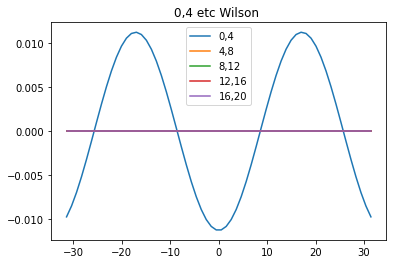

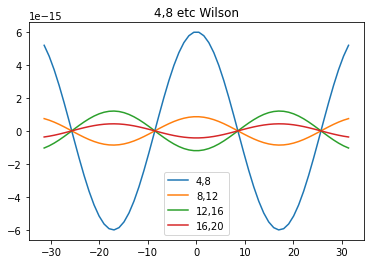

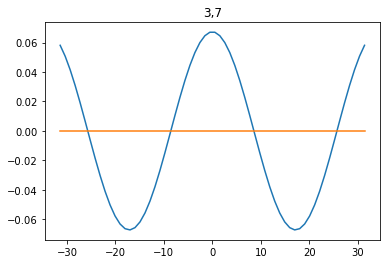

'\nkmanual, Emanual = manualDisp(c1[4,8],.1)\nplt.plot(kmanual, np.real(Emanual))\nplt.plot(kmanual, np.imag(Emanual))\nplt.show()\n\nkmanual, Emanual = manualDisp(c1[101,106],.1)\nplt.plot(kmanual, np.real(Emanual))\nplt.plot(kmanual, np.imag(Emanual))\nplt.show()\n'

In [8]:
#With wilson term to dampen - need to finetune, but thats why 0,4 is so big i think 

kmanual, Emanual = manualDisp(c1[0,4],.1)
plt.plot(kmanual, np.real(Emanual),label='0,4')
#plt.plot(kmanual, np.imag(Emanual))
kmanual, Emanual = manualDisp(c1[4,8],.1)
plt.plot(kmanual, np.real(Emanual),label='4,8')
#plt.plot(kmanual, np.imag(Emanual))
kmanual, Emanual = manualDisp(c1[8,12],.1)
plt.plot(kmanual, np.real(Emanual),label='8,12')
#plt.plot(kmanual, np.imag(Emanual))
kmanual, Emanual = manualDisp(c1[12,16],.1)
plt.plot(kmanual, np.real(Emanual),label='12,16')
kmanual, Emanual = manualDisp(c1[16,20],.1)
plt.plot(kmanual, np.real(Emanual),label='16,20')
plt.title("0,4 etc Wilson ")
plt.legend()
plt.show()

kmanual, Emanual = manualDisp(c1[4,8],.1)
plt.plot(kmanual, np.real(Emanual),label='4,8')
#plt.plot(kmanual, np.imag(Emanual))
kmanual, Emanual = manualDisp(c1[8,12],.1)
plt.plot(kmanual, np.real(Emanual),label='8,12')
#plt.plot(kmanual, np.imag(Emanual))
kmanual, Emanual = manualDisp(c1[12,16],.1)
plt.plot(kmanual, np.real(Emanual),label='12,16')
kmanual, Emanual = manualDisp(c1[16,20],.1)
plt.plot(kmanual, np.real(Emanual),label='16,20')
plt.title("4,8 etc Wilson")
plt.legend()
plt.show()
"""
kmanual, Emanual = manualDisp(c1[1,5],.1)
plt.plot(kmanual, np.real(Emanual))
plt.plot(kmanual, np.imag(Emanual))
plt.title("1,5")
plt.show()
kmanual, Emanual = manualDisp(c1[2,6],.1)
plt.plot(kmanual, np.real(Emanual))
plt.plot(kmanual, np.imag(Emanual))
plt.title("2,6")
plt.show()
"""
kmanual, Emanual = manualDisp(c1[3,7],.1)
plt.plot(kmanual, np.real(Emanual))
plt.plot(kmanual, np.imag(Emanual))
plt.title("3,7")
plt.show()
"""
kmanual, Emanual = manualDisp(c1[4,8],.1)
plt.plot(kmanual, np.real(Emanual))
plt.plot(kmanual, np.imag(Emanual))
plt.show()

kmanual, Emanual = manualDisp(c1[101,106],.1)
plt.plot(kmanual, np.real(Emanual))
plt.plot(kmanual, np.imag(Emanual))
plt.show()
"""

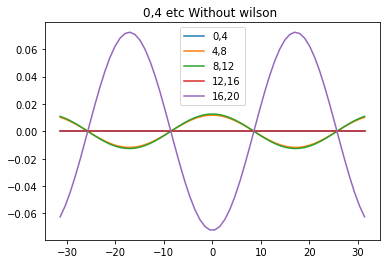

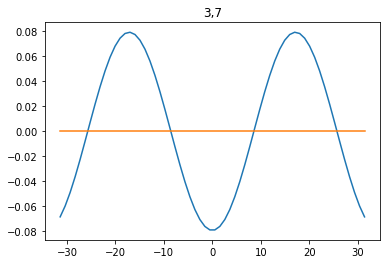

'\nkmanual, Emanual = manualDisp(c1[4,8],.1)\nplt.plot(kmanual, np.real(Emanual))\nplt.plot(kmanual, np.imag(Emanual))\nplt.show()\n\nkmanual, Emanual = manualDisp(c1[101,106],.1)\nplt.plot(kmanual, np.real(Emanual))\nplt.plot(kmanual, np.imag(Emanual))\nplt.show()\n'

In [9]:
#without wilson loop 

kmanual, Emanual = manualDisp(c2[0,4],.1)
plt.plot(kmanual, np.real(Emanual),label='0,4')
#plt.plot(kmanual, np.imag(Emanual))
kmanual, Emanual = manualDisp(c2[4,8],.1)
plt.plot(kmanual, np.real(Emanual),label='4,8')
#plt.plot(kmanual, np.imag(Emanual))
kmanual, Emanual = manualDisp(c2[8,12],.1)
plt.plot(kmanual, np.real(Emanual),label='8,12')
#plt.plot(kmanual, np.imag(Emanual))
kmanual, Emanual = manualDisp(c2[12,16],.1)
plt.plot(kmanual, np.real(Emanual),label='12,16')
kmanual, Emanual = manualDisp(c2[16,20],.1)
plt.plot(kmanual, np.real(Emanual),label='16,20')
plt.title("0,4 etc Without wilson ")
plt.legend()
plt.show()
"""
kmanual, Emanual = manualDisp(c1[1,5],.1)
plt.plot(kmanual, np.real(Emanual))
plt.plot(kmanual, np.imag(Emanual))
plt.title("1,5")
plt.show()
kmanual, Emanual = manualDisp(c1[2,6],.1)
plt.plot(kmanual, np.real(Emanual))
plt.plot(kmanual, np.imag(Emanual))
plt.title("2,6")
plt.show()
"""
kmanual, Emanual = manualDisp(c2[3,7],.1)
plt.plot(kmanual, np.real(Emanual))
plt.plot(kmanual, np.imag(Emanual))
plt.title("3,7")
plt.show()
"""
kmanual, Emanual = manualDisp(c1[4,8],.1)
plt.plot(kmanual, np.real(Emanual))
plt.plot(kmanual, np.imag(Emanual))
plt.show()

kmanual, Emanual = manualDisp(c1[101,106],.1)
plt.plot(kmanual, np.real(Emanual))
plt.plot(kmanual, np.imag(Emanual))
plt.show()
"""

In [ ]:
tryk = FTnormal_to_momentum(c1[0::4,::4])
tryk.shape

In [264]:
trykdiag = np.diag(tryk)

In [252]:
#trykdiag

In [259]:
def getDispursion(Hint, tryk):
    E = []
    for i in range(len(tryk)-1):
        E.append(np.exp(2*np.pi*complex(0,1)*i*tryk[i])*Hint[i][(i+1)] + np.exp(-2*np.pi*complex(0,1)*i*tryk[i])*Hint[i][(i-1)])
    return E
    

In [299]:
disp = getDispursion(c1[::4,::4], tryk)

In [142]:
disp2 = getDispursion(c1, tryk)

In [18]:
import matplotlib.pyplot as plt 

In [19]:
#tryk.T[:-1:4][0].shape

(480,)

In [292]:
len(disp)

199

In [143]:
#ch1 = tryk.T[1:-1:4][110]

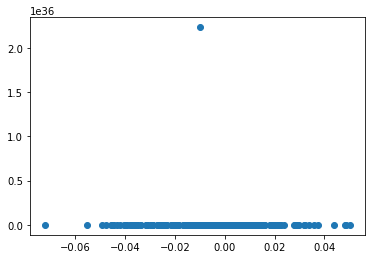

In [303]:
#plt.scatter(tryk[0][:-1],disp)
plt.scatter(tryk[:-1],disp)
#plt.ylim([0,1e2])
plt.show()

In [220]:
fttry = np.fft.fft((c1)[::4,::4])
fttry.shape

(200, 200)

In [123]:
b1.shape

(1920,)

In [241]:
E =np.inner(fttry,c1[::4,::4])

In [242]:
E.shape

(200, 200)

In [243]:
Ediag = np.diag(E)
Ediag.shape

(200,)

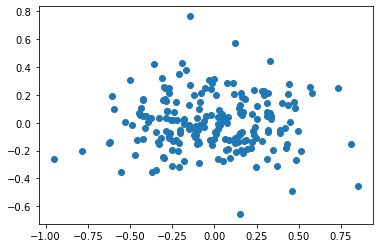

In [251]:
plt.scatter(fttry[::,2],Ediag)
plt.show()